# Logistic Regression(Multi-class Classification)

<img src='mc1.png' height=600 width=600>

In [2]:
from sklearn.datasets import load_digits  # load digit is one of the dataset which is stored in sklearn for practice
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()             # storing the dataset

In [5]:
type(digits)

sklearn.utils.Bunch

In [6]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [7]:
digits.data[0]      # data contains the actual data

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
digits.images[0]    # Okay, that means data and images are containing kind of similar data where data is numerical values

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

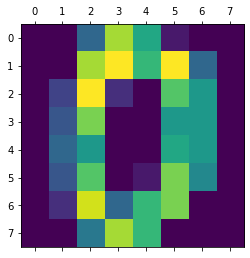

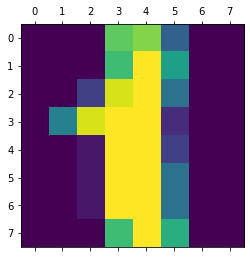

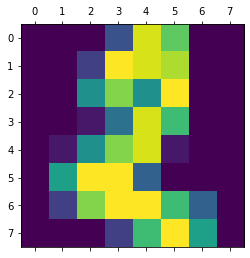

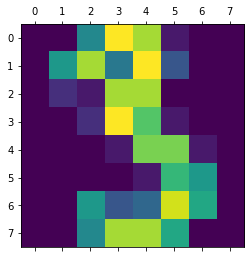

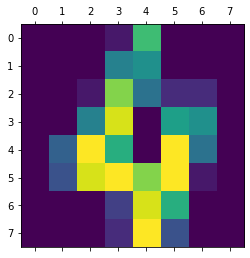

In [10]:
for i in range(5):
    plt.matshow(digits.images[i])

In [11]:
digits.target[0] 

0

In [13]:
digits.target[:5]    # Target is mapped to our data and images

array([0, 1, 2, 3, 4])

#### So, data is our independent variable and target is our dependent variable

### Train, Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [16]:
len(X_train)

1437

In [17]:
len(X_test)

360

### Building model (Logistic Rregression)

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
model.fit(X_train, y_train)

c:\users\shaon\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Results

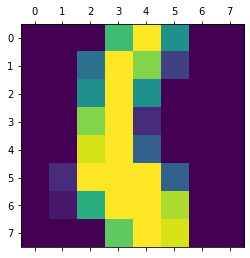

In [23]:
plt.matshow(digits.images[95])  # picking random sample

In [25]:
digits.target[95]   # So, it is 6. Let's see how our model predict

6

In [27]:
model.predict([digits.data[95]]) # our model is trained with numeric data. For that, using digits.data

array([6])

In [28]:
model.predict(digits.data[:5])

array([0, 1, 2, 3, 4])

In [29]:
model.score(X_test, y_test)   # Checking accuracy of model. It's 96.6%

0.9666666666666667

# Confusion Matrix

In [30]:
y_predicted = model.predict(X_test)  # Predicted values for my all test data

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)  # Truth Values & Predicted Values as parameter
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 35,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 31]], dtype=int64)

Let's visualize this confusion matrix using seaborn

Text(69.0, 0.5, 'Truth')

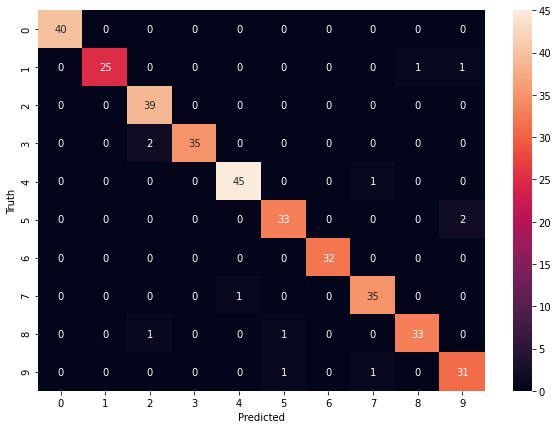

In [32]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)  # Using Heatmap
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Understanding Confusion matrix
40 times truth was 0 and model predicted it 0

25 times truth was 1 and model predicted it 1

39 times truth was 2 and model predicted it 2


2 times truth was 3 and model predicted it as 2

That means, **Any numbers excluded from Diagonal matrix are error.** 
Model predited it wrong

# Exercise
Using sklearn.datasets iris flower dataset to train model using logistic regression. Need to figure out accuracy of model and use that to predict different samples in test dataset. In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width
3. Petal Length
4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica

<img src=iris_petal_sepal.png height=400 width=400>